# Data Hackathon 3.x Data Preparation
https://datahack.analyticsvidhya.com/contest/data-hackathon-3x/

## Load Libiries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

[ERROR UTF-8](https://blog.csdn.net/yimixgg/article/details/80088809?utm_medium=distribute.pc_relevant_t0.none-task-blog-BlogCommendFromMachineLearnPai2-1.nonecase&depth_1-utm_source=distribute.pc_relevant_t0.none-task-blog-BlogCommendFromMachineLearnPai2-1.nonecase)

In [2]:
# Load data:
train = pd.read_csv('Dataset\Train_nyOWmfK.csv',delimiter=',',encoding = "ISO-8859-1")
test = pd.read_csv('Dataset\Test_bCtAN1w.csv',delimiter=',',encoding = "ISO-8859-1")

In [3]:
train.shape,test.shape

((87020, 26), (37717, 24))

In [4]:
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

In [5]:
train['Var5'] = pd.to_numeric(train['Var5'])

In [6]:
# Combine into data:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test],ignore_index=True)
data.shape

(124737, 27)

## Check Missing

In [7]:
data.apply(lambda x:sum(x.isnull()))

ID                           0
Gender                       0
City                      1401
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Tenure_Applied        111
Existing_EMI               111
Employer_Name              113
Salary_Account           16801
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    49535
Loan_Tenure_Submitted    49535
Interest_Rate            84901
Processing_Fee           85346
EMI_Loan_Submitted       84901
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
LoggedIn                 37717
Disbursed                37717
source                       0
dtype: int64

## Look at categories of all object variables:

In [8]:
var = data.select_dtypes('object')
for columns in var:
    print("\nFrequency count for varible {}".format(columns))
    print(data[columns].value_counts())


Frequency count for varible ID
ID085296Q10    1
ID018540C00    1
ID098206E10    1
ID112437N20    1
ID019607D20    1
              ..
ID072645B00    1
ID021636E10    1
ID027950A00    1
ID068745B00    1
ID034709Z40    1
Name: ID, Length: 124737, dtype: int64

Frequency count for varible Gender
Male      71398
Female    53339
Name: Gender, dtype: int64

Frequency count for varible City
Delhi          17936
Bengaluru      15522
Mumbai         15425
Hyderabad      10410
Chennai         9895
               ...  
Rudraprayag        1
Panna              1
LUNAWADA           1
Leh                1
Ramanagara         1
Name: City, Length: 723, dtype: int64

Frequency count for varible DOB
11-Nov-80    426
02-Jan-70    328
01-Jan-70    206
01-Jan-90    198
01-Jan-80    146
            ... 
01-Mar-96      1
05-May-67      1
27-May-73      1
22-May-97      1
20-Sep-72      1
Name: DOB, Length: 12230, dtype: int64

Frequency count for varible Lead_Creation_Date
03-Jul-15    3286
23-Jul-15    2835
2

## Handle Individual Variables

### City Variable:

In [9]:
len(data['City'].unique())
# drop City because too many unique
data.drop('City',axis=1,inplace=True)

### Determine Age from DOB

In [10]:
data['DOB'].head()

0    23-May-78
1    07-Oct-85
2    10-Oct-81
3    30-Nov-87
4    17-Feb-84
Name: DOB, dtype: object

In [11]:
# Create age variable:

# int(data['DOB'][0][-2:])
data['Age'] = data['DOB'].apply(lambda x:115 - int(x[-2:]))
data['Age'].head()

0    37
1    30
2    34
3    28
4    31
Name: Age, dtype: int64

In [12]:
# drop DOB:
data.drop('DOB',axis=1,inplace=True)

### EMI_Load_Submitted

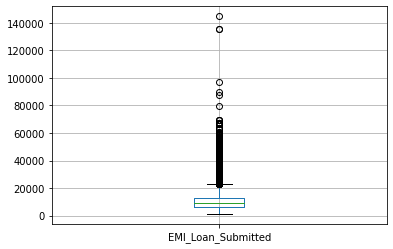

In [13]:
data.boxplot(column=['EMI_Loan_Submitted'],return_type='axes')

In [14]:
# Majority values missing so I'll create a new variable stating whether this is missing or note
data['EMI_Loan_Submitted_Missing'] = data['EMI_Loan_Submitted'].apply(lambda x:1 if pd.isnull(x) else 0)
data[['EMI_Loan_Submitted','EMI_Loan_Submitted_Missing']].head(10)

,EMI_Loan_Submitted,EMI_Loan_Submitted_Missing
0,NaN,1
1,6762.90,0
2,NaN,1
3,NaN,1
4,NaN,1
5,6978.92,0
6,NaN,1
7,NaN,1
8,30824.65,0
9,10883.38,0


In [15]:
# drop original variables:
data.drop('EMI_Loan_Submitted',axis=1,inplace=True)

### Employer Name

In [16]:
len(data['Employer_Name'].value_counts())

57193

In [17]:
# I'll drop the variable because too many unique values. Another option could
# be to categorize them manually
data.drop('Employer_Name',axis=1,inplace=True)

### Existing EMI


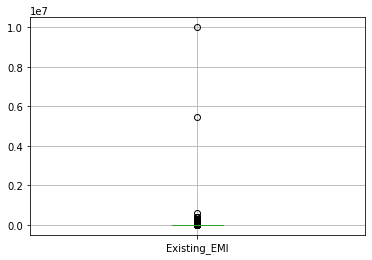

In [18]:
data.boxplot(column='Existing_EMI',return_type='axes')

In [19]:
data['Existing_EMI'].describe()

count    1.246260e+05
mean     3.636342e+03
std      3.369124e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

In [20]:
# Impute by median(0) because just 111 missinig:
data['Existing_EMI'].fillna(0,inplace=True)

### Interest Rate

In [21]:
# Majority values missing so I'll create a new variable stating whether
# this is missing or not:
data['Interesting_Rate_Missing'] = data['Interest_Rate'].apply(lambda x:1 if pd.isnull(x) else 0)
print(data[['Interest_Rate','Interesting_Rate_Missing']].head(10))

   Interest_Rate  Interesting_Rate_Missing
0            NaN                         1
1          13.25                         0
2            NaN                         1
3            NaN                         1
4            NaN                         1
5          13.99                         0
6            NaN                         1
7            NaN                         1
8          14.85                         0
9          18.25                         0


In [22]:
data.drop('Interest_Rate',axis=1,inplace=True)

### Lead Creation Date:

In [23]:
# Drop this varible because doesn't appear to affect much intuitively
data.drop('Lead_Creation_Date',axis=1,inplace=True)

### Loan Amount and Tenure applied:

In [24]:
# Impute with median because only 111 missing
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)

### Loan Amount and Tensure selected

In [25]:
# High proportion missing so create a new var whether present or not
data['Loan_Amount_Submitted_Missing'] = data['Loan_Amount_Submitted'].apply(lambda x:1 if pd.isnull(x) else 0)
data['Loan_Tensure_Submitted_Missing'] = data['Loan_Tenure_Submitted'].apply(lambda x:1 if pd.isnull(x) else 0)

In [26]:
# Remove old vars
data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)

### Remove logged-in

In [27]:
data.drop('LoggedIn',axis=1,inplace=True)

### Remove salary account

In [28]:
# Salary account has many banks which have to manually grouped
data.drop('Salary_Account',axis=1,inplace=True)

### Processing_Fee

In [29]:
# High proportion missing so create a new var whether present or not 
data['Processing_Fee_Missing'] = data['Processing_Fee'].apply(lambda x:1 if pd.isnull(x) else 0)
# drop old 
data.drop('Processing_Fee',axis=1,inplace=True)

### Source

In [30]:
data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
data['Source'].value_counts()

S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

## Final Data:


In [31]:
data.apply(lambda x:sum(x.isnull()))

ID                                    0
Gender                                0
Monthly_Income                        0
Loan_Amount_Applied                   0
Loan_Tenure_Applied                   0
Existing_EMI                          0
Mobile_Verified                       0
Var5                                  0
Var1                                  0
Filled_Form                           0
Device_Type                           0
Var2                                  0
Source                                0
Var4                                  0
Disbursed                         37717
source                                0
Age                                   0
EMI_Loan_Submitted_Missing            0
Interesting_Rate_Missing              0
Loan_Amount_Submitted_Missing         0
Loan_Tensure_Submitted_Missing        0
Processing_Fee_Missing                0
dtype: int64

In [32]:
data.dtypes

ID                                 object
Gender                             object
Monthly_Income                      int64
Loan_Amount_Applied               float64
Loan_Tenure_Applied               float64
Existing_EMI                      float64
Mobile_Verified                    object
Var5                                int64
Var1                               object
Filled_Form                        object
Device_Type                        object
Var2                               object
Source                             object
Var4                                int64
Disbursed                         float64
source                             object
Age                                 int64
EMI_Loan_Submitted_Missing          int64
Interesting_Rate_Missing            int64
Loan_Amount_Submitted_Missing       int64
Loan_Tensure_Submitted_Missing      int64
Processing_Fee_Missing              int64
dtype: object

### Numerical Coding:

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

In [38]:
data.shape

(124737, 22)

### One-Hot Encoding

In [39]:
data = pd.get_dummies(data, columns=var_to_encode)
data.columns

Index(['ID', 'Monthly_Income', 'Loan_Amount_Applied', 'Loan_Tenure_Applied',
       'Existing_EMI', 'Var5', 'Var4', 'Disbursed', 'source', 'Age',
       'EMI_Loan_Submitted_Missing', 'Interesting_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tensure_Submitted_Missing',
       'Processing_Fee_Missing', 'Device_Type_0', 'Device_Type_1',
       'Filled_Form_0', 'Filled_Form_1', 'Gender_0', 'Gender_1', 'Var1_0',
       'Var1_1', 'Var1_2', 'Var1_3', 'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7',
       'Var1_8', 'Var1_9', 'Var1_10', 'Var1_11', 'Var1_12', 'Var1_13',
       'Var1_14', 'Var1_15', 'Var1_16', 'Var1_17', 'Var1_18', 'Var2_0',
       'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4', 'Var2_5', 'Var2_6',
       'Mobile_Verified_0', 'Mobile_Verified_1', 'Source_0', 'Source_1',
       'Source_2'],
      dtype='object')

In [41]:
data.shape

(124737, 52)

### Seperate train & test:

In [42]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

In [43]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Disbursed'],axis=1,inplace=True)

C:\Users\Jason\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)